# Consigna del trabajo práctico 2

Este trabajo práctico consiste de los siguientes pasos:

1.   Van a recibir dos archivos con datos: train.csv y test4alumnxs.csv, los cuales contienen información sobre accidentes de tránsito en EEUU (más información abajo). La diferencia entre los archivos es que train.csv tiene la columna 'Severity' (severidad) mientras que test4alumnxs.csv no la tiene.
2.   El objetivo es usar los datos para construir un modelo que prediga la severidad del accidente (columna 'Severity', donde 0 es baja severidad y 1 es alta severidad). Para esto, primero pueden usar los datos del archivo train.csv para ajustar los parámetros de su modelo, ajustar los hiperparámetros, combinar los features para agregar nuevos, estandarizar los datos, etc. Al terminar esto, tienen un modelo entrenado en estos datos, y una idea de que tan bien funciona.
3.   Luego, aplican ese modelo a los datos de test4alumnxs.csv y generan un vector de probabilidades que representan la probabilidad de que cada accidente sea severo.
4.   Nosotros tenemos acceso a las etiquetas, así que podemos calcular el AUC de sus predicciones. Con eso construimos un ranking y le damos los siguientes premios al 1er, 2do y 3er puesto.

**Primer puesto:**

"El nudo de la conciencia", autografiado (??) por su autor

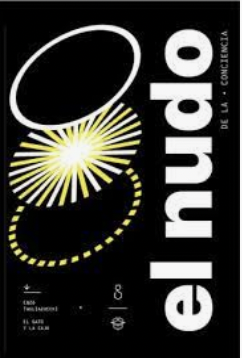

**Segundo puesto:**

"Un libro sobre drogas", autografiado (??) por uno de sus autores

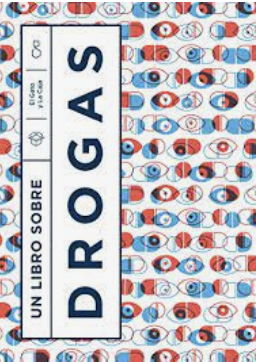

**Tercer puesto:**

"Tabú" 

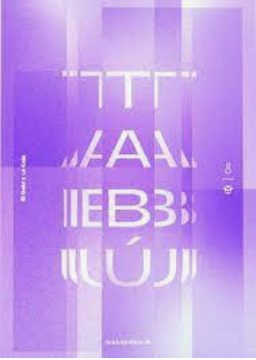



# ¿Cómo se puntua el TP?

**C (0 puntos)**, si no entregan o bien el formato de lo que entregan no es correcto (por ejemplo, la cantidad de probabilidades no es igual a la cantidad de datos en test4alumnxs.csv).

**B (0.5 puntos)**, si entregan y el AUC es menor que 0.7 (más abajo damos un ejemplo donde el auc es 0.73, así que para sacar B tienen que hacer algo que empeore el ejemplo que ya les damos hecho).

**A (1 punto)**, si entregan con un AUC mayor a 0.7.

Recuerden que este TP suma como máximo 1 punto a la nota final de la materia.

# Los datos

Los datos corresponden a registros de accidentes de tránsito en EEUU entre 2016 y 2021.

Las primeras dos columnas ("unnamed") no sirve nara nada y se pueden descartar. 

La columna 'Severity' contiene la severidad del accidente (0 significa baja, 1 significa alta)

Luego tenemos la hora de comienzo y final del accidente, la latitud/longitud inicial y final del accidente (entre que valores queda delimitado), la distancia de camino afectada por el accidente, una descripción verbal hecha por un humano, número y nombre de la calle donde ocurrió, lado de la calle (izquierda o derecha), ciudad, condado, estado, código postal, huso horario, código de aeropuerto donde se encuentra la estación meterológica más cercana al accidente, hora en la cual se midió el clima,temperatura, temperatura del viento, humedad, presión, visibilidad, dirección del viento, condición climática (despejado, sol, nieve, etc), presencia de comodidades ("amenities") en la cercanía del accidente, presencia de loma de burro, presencia de un cruce, presencia de señal de ceder paso, presencia de unión de calles, presencia de cartel de no salida, presencia de vías de tren, presencia de rotonda, presencia de estación, presencia de signo de parar, presencia de moderadores de tráfico, presencia de señales de tránsito, presencia de calle en forma de U ("loop"), día u oscuridad de acuerdo a la salida del sol, día u oscuridad de acuerdo a la penumbra civil (si es o no necesario utilizar alumbramiento eléctrico), día u oscuridad de acuerdo a la penumbra náutica, día u oscuridad de acuerdo a la penumbra astronómica.

No todos estos campos son necesariamente útiles, y tampoco no todos están en un formato numérico directamente utilizable (por ejemplo, hay strings en la parte de descripción del accidente). Es parte del trabajo decidir que features quedarse, que features sumar, y como extraer información relevante de los features más complejos. 

# Ejemplo

Vamos a darles un ejemplo para que entiendan mejor lo que les estamos pidiendo.

Primero, cargamos el archivo train.csv que contiene los datos para entrenar nuestro modelo. Además cargamos test4alumnxs.csv para obtener las predicciones que vamos a entregar.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

drive.mount('/content/drive') # montamos el drive

# cargamos el dataframe de entrenamiento y el dataframe de testeo
# el dataframe de entrenamiento tiene toda la información, incluyendo la columna 'Severity' (severidad)
# esta es la columna que vamos a entrenar el modelo para predecir: 0=severidad baja; 1=severidad alta.
# en cambio, el dataframe de test no tiene esta columna: son los datos que usamos para generar la predicción que se entrega 
filename_train = '/content/drive/My Drive/LaboDatos2022/SegundaEjercitacion/train.csv' 
filename_test = '/content/drive/My Drive/LaboDatos2022/SegundaEjercitacion/test4alumnxs.csv' 

df_train = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Luego, sacamos el vector de etiquetas (severidad).

En este modelo de ejemplo únicamente vamos a usar el subconjunto de features que corresponde a variables climáticas: temperatura, temperatura del viento, humedad, presión, visibilidad, velocidad del viento y precipitación. Obviamente ustedes pueden explorar todos los datos. 

Con esto armamos la matriz X. Luego, separamos un 70%/30% para train y test del modelo. Entrenamos un Random Forest como viene de fábrica y predecimos las etiquetas en el 30% restante. El auc final es aproximadamente 0.73 (nada mal).



In [ ]:
y = np.array(df_train['Severity']) # armo el vector de etiquetas

# vamos a entrenar un modelo usando únicamente variables asociadas a clima
columnas_clima = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)',  'Wind_Speed(mph)','Precipitation(in)']

# extraigo la matriz de features X
X = np.array(df_train[columnas_clima])

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# pruebo con un random forest así como viene de fábrica
clf = RandomForestClassifier()  

# ajusto el modelo
clf.fit(X_train, y_train)

# armo el vector de predicciones.
y_hat_test = clf.predict_proba(X_test)[:, 1]
y_hat_train = clf.predict_proba(X_train)[:, 1]

# evaluo el AUC
roc_test = roc_auc_score(y_test, y_hat_test)
roc_train = roc_auc_score(y_train, y_hat_train)
roc_test, roc_train


(0.7288418540359649, 0.9997130330087539)

¿Qué significan estos valores de AUC en train y test set? ¿Cómo mejorarlos?

Por último, aplicamos el modelo ya entrenado a los datos de test4alumnxs.csv, guardamos el vector "predicciones" y lo descargamos, tal como muestra el screenshot de más abajo. Ese es el vector que se entrega, nada más. Es lo que nosotros usamos para calcular el AUC final.

En este paso, si su modelo estandariza los datos, o bien los transforma de distintas maneras, etc, ustedes tienen que aplicar esas mismas transformaciones a estos features para poder aplicar su modelo.

In [ ]:
X = np.array(df_test[columnas_clima]) # cargo el dataset de testeo

predicciones = clf.predict_proba(X_test)[:, 1] # obtengo el vector de probabilidades
# este es el vector que vamos a entregar como resultado del TP

print(predicciones)

# lo guardo en el espacio de trabajo de colab
np.savetxt('predicciones.csv', predicciones, delimiter=",")


Una vez grabado el archivo, es fácil de descargar, buscándolo en el ícono de carpeta a la izquierda y apretando 'Descargar' en el menú desplegable, como muestra la imagen:

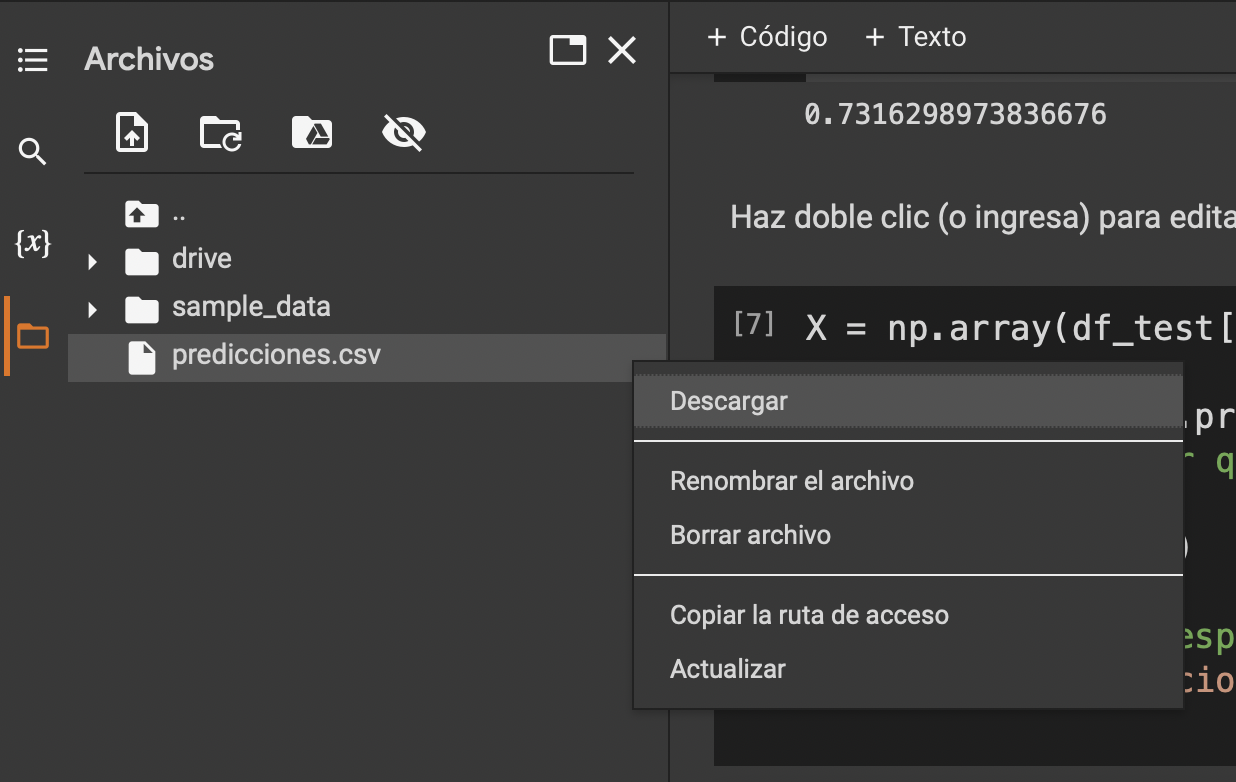